### <center> IBM Capstone Project <center>
# <center> The battle of the neighborhoods <center>
#### <center> by Tieu My Trinh <center>

## Importing libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

from bs4 import BeautifulSoup

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [2]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install folium==0.5.0
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

## Neighborhood data

##### Download data

In [3]:
!wget -q -O 'sf_data.json' https://bit.ly/2MgWlwg
print('Data downloaded!')

Data downloaded!


In [4]:
with open('sf_data.json') as json_data:
    sf_data = json.load(json_data)

In [5]:
neighborhoods_data = sf_data['features']

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'properties': {'nhood': 'Bayview Hunters Point'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-122.38157774241415, 37.75307043091241],
     [-122.38156949251606, 37.753060959298274],
     [-122.38159239626694, 37.75309424492931],
     [-122.38155614326205, 37.753045901366754],
     [-122.38155137472305, 37.75304127677009],
     [-122.38154650687193, 37.753036719547374],
     [-122.3815415385967, 37.75303223061754],
     [-122.38153647334677, 37.75302781172802],
     [-122.38153131112232, 37.75302346287867],
     [-122.38152605423795, 37.753019185835115],
     [-122.38152070389688, 37.75301498328154],
     [-122.38151526236827, 37.75301085518192],
     [-122.38150973196667, 37.75300680330162],
     [-122.38150411158058, 37.75300282855954],
     [-122.38149840577098, 37.7529989317842],
     [-122.38149261460651, 37.75299511567804],
     [-122.38148674033339, 37.75299137930393],
     [-122.38148078528907, 37.75298772532827],
     [-122.38147475063121, 3

##### Create dataframe Neighborhood

In [7]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    neighborhood_name = data['properties']['nhood']      
    neighborhoods = neighborhoods.append({'Neighborhood': neighborhood_name}, ignore_index=True)
    
neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,Bayview Hunters Point,NaN,NaN
1,Bernal Heights,NaN,NaN
2,Castro/Upper Market,NaN,NaN
3,Chinatown,NaN,NaN
4,Excelsior,NaN,NaN


##### Clean the data

In [8]:
#Cleaning the data
neighborhoods['Neighborhood'][7] = 'Richmond'
neighborhoods['Neighborhood'][17] = 'Lone Mountain'
neighborhoods['Neighborhood'][26] = 'Ingleside'
neighborhoods['Neighborhood'][28] = 'Sunset'
neighborhoods['Neighborhood'][39] = 'West'
neighborhoods.drop([30, 1])
neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,Bayview Hunters Point,NaN,NaN
1,Bernal Heights,NaN,NaN
2,Castro/Upper Market,NaN,NaN
3,Chinatown,NaN,NaN
4,Excelsior,NaN,NaN


##### Get the latitude and longitute of each neighborhood

In [9]:
geolocator = Nominatim(user_agent="sfus_explorer")

for i in range(len(neighborhoods)) : 
    address = str(neighborhoods.loc[i, "Neighborhood"] + ', SF')
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    neighborhoods['Latitude'][i] = latitude
    neighborhoods['Longitude'][i] = longitude
    #neighborhoods = neighborhoods.append({'Latitude': latitude, 'Longitude': longitude}, ignore_index=True)

In [10]:
neighborhoods

,Neighborhood,Latitude,Longitude
0,Bayview Hunters Point,37.7413,-122.378
1,Bernal Heights,37.743,-122.416
2,Castro/Upper Market,37.7609,-122.435
3,Chinatown,37.7943,-122.406
4,Excelsior,37.7218,-122.435
5,Financial District/South Beach,37.7866,-122.395
6,Glen Park,37.7343,-122.434
7,Richmond,37.777,-122.465
8,Golden Gate Park,37.7694,-122.482
9,Haight Ashbury,37.77,-122.447


##### Visualize the neighborhoods on the map

In [11]:
# create map of San Francisco using latitude and longitude values
map_sf = folium.Map(width=700, height=500, location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}, SF'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)  
    
map_sf

## Income data

##### Download the data

In [12]:
path ='https://drive.google.com/uc?export=download&id=1zrxjJCkr67nmaDRm6fBYuDVZ8jkIr-jY'
neighborhoods_income = pd.read_csv(path, index_col=0)

##### Plot the income

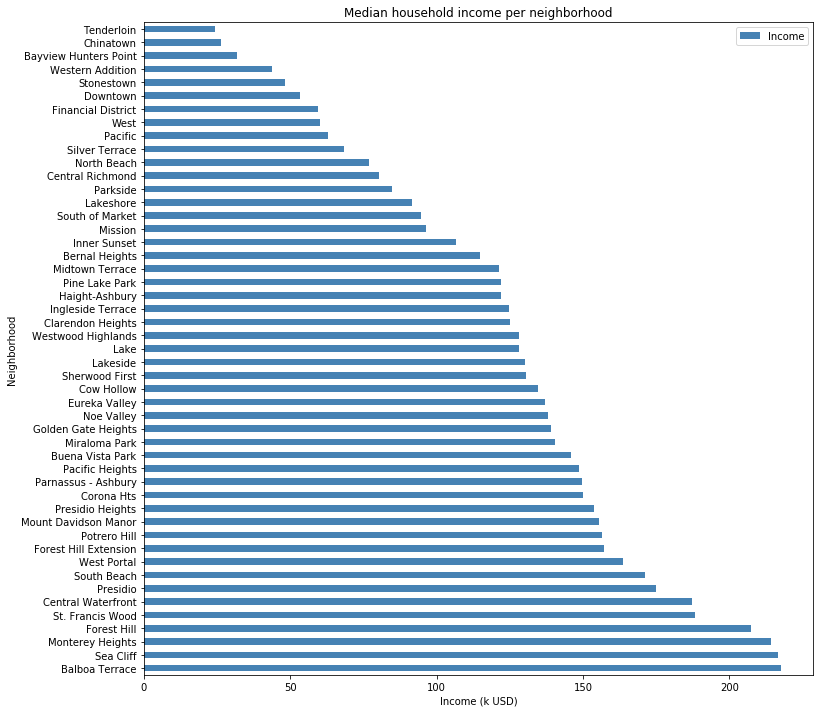

In [13]:
neighborhoods_income.plot(kind='barh', figsize=(12,12), color='steelblue')

plt.xlabel('Income (k USD)') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Median household income per neighborhood') # add title to the plot

plt.show()

## Foursquare venues

In [14]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'ODD3V3DSNE4FI2QQ50OY0YGV2OD0X5P2ZPK1CP3W4LHKX45U' # your Foursquare ID
CLIENT_SECRET = 'HXLCP3ZMDNPXNVPJHSR55NJZGD2I5VHDE4TZG3SSUSNCBDCZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ODD3V3DSNE4FI2QQ50OY0YGV2OD0X5P2ZPK1CP3W4LHKX45U
CLIENT_SECRET:HXLCP3ZMDNPXNVPJHSR55NJZGD2I5VHDE4TZG3SSUSNCBDCZ


In [15]:
#Create a function to get nearby venues and put into a dataframe, including: Neighborhood, Neigh.Lat, Neigh.Long, Venue, Venue.Lat, Venue.Long, Venue.Category
LIMIT = 1000
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
#Get nearby venues of San Francisco and put into a dataframe, including: Neighborhood, Neigh.Lat, Neigh.Long, Venue, Venue.Lat, Venue.Long, Venue.Category
neighborhoods_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

print(neighborhoods_venues.shape)
neighborhoods_venues.head()

Bayview Hunters Point
Bernal Heights
Castro/Upper Market
Chinatown
Excelsior
Financial District/South Beach
Glen Park
Richmond
Golden Gate Park
Haight Ashbury
Hayes Valley
Inner Sunset
Japantown
McLaren Park
Tenderloin
Lakeshore
Lincoln Park
Lone Mountain
Marina
Russian Hill
Mission
Mission Bay
Nob Hill
Seacliff
Noe Valley
North Beach
Ingleside
South of Market
Sunset
Outer Mission
Outer Richmond
Pacific Heights
Portola
Potrero Hill
Presidio
Presidio Heights
Treasure Island
Twin Peaks
Visitacion Valley
West
Western Addition
(2014, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bayview Hunters Point,37.741286,-122.377633,Heron's Head Park,37.739663,-122.375904,Park
1,Bayview Hunters Point,37.741286,-122.377633,Speakeasy Ales & Lagers,37.738468,-122.380874,Brewery
2,Bayview Hunters Point,37.741286,-122.377633,Bay Natives Nursery,37.740532,-122.376845,Garden Center
3,Bayview Hunters Point,37.741286,-122.377633,Hunter’s Point Shoreline,37.738240,-122.376753,Waterfront
4,Bayview Hunters Point,37.741286,-122.377633,USPS Cafeteria,37.740744,-122.382309,Café


In [17]:
neighborhoods_venues['Venue Category'].value_counts().to_frame()

,Venue Category
Coffee Shop,92
Café,57
Park,52
Pizza Place,49
Italian Restaurant,44
Mexican Restaurant,43
Bakery,41
Sushi Restaurant,34
Grocery Store,33
Sandwich Place,32


In [18]:
neighborhoods_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview Hunters Point,7,7,7,7,7,7
Bernal Heights,71,71,71,71,71,71
Castro/Upper Market,96,96,96,96,96,96
Chinatown,100,100,100,100,100,100
Excelsior,46,46,46,46,46,46
Financial District/South Beach,68,68,68,68,68,68
Glen Park,30,30,30,30,30,30
Golden Gate Park,18,18,18,18,18,18
Haight Ashbury,97,97,97,97,97,97


##### Check how many unique categories

In [19]:
#Check how many unique categories
print('There are {} unique categories.'.format(len(neighborhoods_venues['Venue Category'].unique())))

There are 290 unique categories.


In [20]:
# one hot encoding
neighborhoods_onehot = pd.get_dummies(neighborhoods_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighborhoods_onehot['Neighborhood'] = neighborhoods_venues['Neighborhood'] 

# define a list of column names
cols = neighborhoods_onehot.columns.tolist()
cols

# move the column name to the beggining
cols.insert(0, cols.pop(cols.index('Neighborhood')))
cols

#then use .reindex() function to reorder
neighborhoods_onehot = neighborhoods_onehot.reindex(columns= cols)

#check result
neighborhoods_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Alternative Healer,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dive Shop,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Island,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music School,Music Store,Music Venue,Nabe Restaurant,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Park,Parking,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Physical Therapist,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Reservoir,Restaurant,Road,Rock Club,Roof Deck,Rugby Pitch,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trade School,Trail,Trattoria/Osteria,Travel Agency,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Waterfall,Waterfront,Wine Bar,Win

In [21]:
neighborhoods_onehot.shape

(2014, 290)

In [22]:
neighborhoods_grouped = neighborhoods_onehot.groupby('Neighborhood').mean().reset_index()
neighborhoods_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Alternative Healer,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dive Shop,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Island,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music School,Music Store,Music Venue,Nabe Restaurant,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Park,Parking,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Physical Therapist,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Reservoir,Restaurant,Road,Rock Club,Roof Deck,Rugby Pitch,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trade School,Trail,Trattoria/Osteria,Travel Agency,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Waterfall,Waterfront,Wine Bar,Win

In [23]:
num_top_venues = 5

for hood in neighborhoods_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = neighborhoods_grouped[neighborhoods_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bayview Hunters Point----
           venue  freq
0           Café  0.14
1     Restaurant  0.14
2        Brewery  0.14
3     Waterfront  0.14
4  Garden Center  0.14


----Bernal Heights----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.04
2               Trail  0.04
3       Grocery Store  0.04
4          Playground  0.04


----Castro/Upper Market----
               venue  freq
0            Gay Bar  0.09
1        Coffee Shop  0.04
2    Thai Restaurant  0.04
3  Indian Restaurant  0.02
4  Convenience Store  0.02


----Chinatown----
                     venue  freq
0       Italian Restaurant  0.07
1       Chinese Restaurant  0.07
2              Coffee Shop  0.06
3             Cocktail Bar  0.04
4  New American Restaurant  0.04


----Excelsior----
                   venue  freq
0     Mexican Restaurant  0.11
1                 Bakery  0.09
2      Convenience Store  0.07
3  Vietnamese Restaurant  0.04
4                   Bank  0.04


----Financial Distric

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### List the 10 most common venue in each neighborhood

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = neighborhoods_grouped['Neighborhood']

for ind in np.arange(neighborhoods_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neighborhoods_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview Hunters Point,Brewery,Restaurant,Food Truck,Café,Park,Garden Center,Waterfront,Discount Store,Garden,Furniture / Home Store
1,Bernal Heights,Coffee Shop,Mexican Restaurant,Playground,Grocery Store,Trail,Italian Restaurant,Food Truck,American Restaurant,Vietnamese Restaurant,Bakery
2,Castro/Upper Market,Gay Bar,Coffee Shop,Thai Restaurant,Yoga Studio,Gym,Convenience Store,Cosmetics Shop,Pet Store,Deli / Bodega,New American Restaurant
3,Chinatown,Chinese Restaurant,Italian Restaurant,Coffee Shop,Cocktail Bar,New American Restaurant,Bakery,Hotel,Szechuan Restaurant,Tea Room,Dive Bar
4,Excelsior,Mexican Restaurant,Bakery,Convenience Store,Pizza Place,Bank,Vietnamese Restaurant,Latin American Restaurant,Sandwich Place,Chinese Restaurant,Thai Restaurant


## Clustering Neighborhoods

##### Group neighborhoods into 4 clusters

In [26]:
neighborhoods_grouped_clustering = neighborhoods_grouped.drop('Neighborhood', 1)

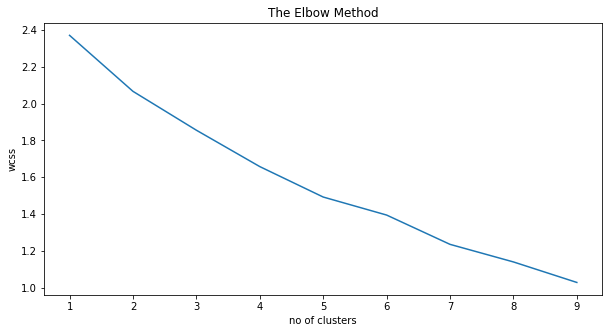

In [27]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42,max_iter=10000,tol=0.000001)
    kmeans.fit(neighborhoods_grouped_clustering)
    wcss.append(kmeans.inertia_)

#inertia_ is the formula used to segregate the data points into clusters
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(10,5))
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [28]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighborhoods_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 1, 1, 1, 1, 1, 2, 1, 1], dtype=int32)

In [29]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_merged = neighborhoods

# merge with neighborhoods data to add latitude/longitude for each neighborhood
neighborhoods_merged = neighborhoods_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

neighborhoods_merged.dropna(subset=['Cluster Labels'], axis=0, inplace=True)
neighborhoods_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview Hunters Point,37.7413,-122.378,2,Brewery,Restaurant,Food Truck,Café,Park,Garden Center,Waterfront,Discount Store,Garden,Furniture / Home Store
1,Bernal Heights,37.743,-122.416,1,Coffee Shop,Mexican Restaurant,Playground,Grocery Store,Trail,Italian Restaurant,Food Truck,American Restaurant,Vietnamese Restaurant,Bakery
2,Castro/Upper Market,37.7609,-122.435,1,Gay Bar,Coffee Shop,Thai Restaurant,Yoga Studio,Gym,Convenience Store,Cosmetics Shop,Pet Store,Deli / Bodega,New American Restaurant
3,Chinatown,37.7943,-122.406,1,Chinese Restaurant,Italian Restaurant,Coffee Shop,Cocktail Bar,New American Restaurant,Bakery,Hotel,Szechuan Restaurant,Tea Room,Dive Bar
4,Excelsior,37.7218,-122.435,1,Mexican Restaurant,Bakery,Convenience Store,Pizza Place,Bank,Vietnamese Restaurant,Latin American Restaurant,Sandwich Place,Chinese Restaurant,Thai Restaurant


##### Visualize the clusters on the map

In [30]:
# create map
map_clusters = folium.Map(width=700, height=500, location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_merged['Latitude'], neighborhoods_merged['Longitude'], neighborhoods_merged['Neighborhood'], neighborhoods_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-2],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.6).add_to(map_clusters)
       
map_clusters

##### Examine the clusters

In [31]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 0]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Seacliff,37.7885,-122.487,0,Playground,Beach,Fountain,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Yoga Studio


In [32]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 1]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bernal Heights,37.743,-122.416,1,Coffee Shop,Mexican Restaurant,Playground,Grocery Store,Trail,Italian Restaurant,Food Truck,American Restaurant,Vietnamese Restaurant,Bakery
2,Castro/Upper Market,37.7609,-122.435,1,Gay Bar,Coffee Shop,Thai Restaurant,Yoga Studio,Gym,Convenience Store,Cosmetics Shop,Pet Store,Deli / Bodega,New American Restaurant
3,Chinatown,37.7943,-122.406,1,Chinese Restaurant,Italian Restaurant,Coffee Shop,Cocktail Bar,New American Restaurant,Bakery,Hotel,Szechuan Restaurant,Tea Room,Dive Bar
4,Excelsior,37.7218,-122.435,1,Mexican Restaurant,Bakery,Convenience Store,Pizza Place,Bank,Vietnamese Restaurant,Latin American Restaurant,Sandwich Place,Chinese Restaurant,Thai Restaurant
5,Financial District/South Beach,37.7866,-122.395,1,Coffee Shop,Café,Food Truck,Juice Bar,Bar,Seafood Restaurant,Salad Place,Cocktail Bar,Brazilian Restaurant,Gym / Fitness Center
6,Glen Park,37.7343,-122.434,1,Park,Coffee Shop,Café,Alternative Healer,Thai Restaurant,French Restaurant,Bus Line,Cheese Shop,Pizza Place,Bubble Tea Shop
7,Richmond,37.777,-122.465,1,Korean Restaurant,Sushi Restaurant,Massage Studio,Pizza Place,Coffee Shop,Bar,Chinese Restaurant,Gift Shop,Breakfast Spot,Gas Station
9,Haight Ashbury,37.77,-122.447,1,Boutique,Thrift / Vintage Store,Café,Clothing Store,Bus Station,Convenience Store,Thai Restaurant,Breakfast Spot,Shoe Store,Bookstore
10,Hayes Valley,37.7767,-122.423,1,Wine Bar,Clothing Store,Café,Boutique,French Restaurant,Bakery,Pizza Place,Park,Theater,Dessert Shop
11,Inner Sunset,37.7615,-122.468,1,Coffee Shop,Sandwich Place,Pizza Place,Ice Cream Shop,Mediterranean Restaurant,Thai Restaurant,Sushi Restaurant,Gym,Korean Restaurant,Bakery


In [33]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 2]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview Hunters Point,37.7413,-122.378,2,Brewery,Restaurant,Food Truck,Café,Park,Garden Center,Waterfront,Discount Store,Garden,Furniture / Home Store
8,Golden Gate Park,37.7694,-122.482,2,Park,Music Venue,Lake,BBQ Joint,Waterfall,Bus Stop,Harbor / Marina,Dog Run,Sculpture Garden,Track
16,Lincoln Park,37.7846,-122.499,2,Scenic Lookout,Trail,Monument / Landmark,Cafeteria,Park,Café,Sculpture Garden,Gift Shop,Golf Course,Art Museum
33,Potrero Hill,37.7566,-122.399,2,Grocery Store,Park,Deli / Bodega,Trail,Liquor Store,Hill,Playground,Plaza,Cosmetics Shop,Convenience Store
34,Presidio,37.7987,-122.465,2,Brewery,Art Gallery,Outdoor Sculpture,Trail,Tunnel,Bowling Alley,Park,General Entertainment,American Restaurant,Frozen Yogurt Shop
38,Visitacion Valley,37.7121,-122.41,2,Park,Vietnamese Restaurant,Chocolate Shop,Grocery Store,Yoga Studio,Food Stand,Flea Market,Flower Shop,Food,Food & Drink Shop


In [34]:
neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 3]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,McLaren Park,37.7146,-122.416,3,Park,Scenic Lookout,Pool,Trail,Playground,Yoga Studio,Food Court,Flea Market,Flower Shop,Food
37,Twin Peaks,37.7546,-122.446,3,Trail,Scenic Lookout,Bus Station,Bus Stop,Reservoir,Hill,Tailor Shop,Frame Store,French Restaurant,Fountain


## Analyzing Crime data

##### Download crime data

In [35]:
path = 'https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD'
df_crime1 = pd.read_csv(path)
df_crime1.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2019/05/01 01:00:00 AM,2019/05/01,01:00,2019,Wednesday,2019/06/12 08:27:00 PM,81097515200,810975,190424067,191634131.0,II,Initial,NaN,15200,Offences Against The Family And Children,Other,Domestic Violence (secondary only),Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,NaN,NaN,NaN,NaN,NaN,1.0
1,2019/06/22 07:45:00 AM,2019/06/22,07:45,2019,Saturday,2019/06/22 08:05:00 AM,81465564020,814655,190450880,191730737.0,II,Initial,NaN,64020,Non-Criminal,Other,Mental Health Detention,Open or Active,06TH ST \ MINNA ST,24285000.0,Southern,South of Market,6.0,37.780535,-122.408161,"(37.7805353858225, -122.40816079455212)",32.0,1.0,10.0,34.0,1.0,NaN,1.0,NaN,NaN,2.0
2,2019/06/03 04:16:00 PM,2019/06/03,16:16,2019,Monday,2019/06/03 04:16:00 PM,80769875000,807698,190397016,191533509.0,IS,Initial Supplement,NaN,75000,Missing Person,Missing Person,Found Person,Open or Active,EGBERT AVE \ INGALLS ST,20447000.0,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,"(37.72159985216247, -122.39074534279013)",88.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
3,2018/11/16 04:34:00 PM,2018/11/16,16:34,2018,Friday,2018/11/16 04:34:00 PM,73857915041,738579,180870806,183202539.0,IS,Initial Supplement,NaN,15041,Offences Against The Family And Children,Family Offenses,Elder Adult or Dependent Abuse (not Embezzleme...,Cite or Arrest Adult,MERCHANT ST \ KEARNY ST,24773000.0,Central,Chinatown,3.0,37.794860,-122.404876,"(37.794859532228344, -122.40487561154785)",104.0,6.0,3.0,6.0,NaN,18.0,NaN,NaN,NaN,2.0
4,2019/05/27 02:25:00 AM,2019/05/27,02:25,2019,Monday,2019/05/27 02:55:00 AM,80509204134,805092,190378555,191470256.0,II,Initial,NaN,4134,Assault,Simple Assault,Battery,Open or Active,LAGUNA ST \ UNION ST,26583000.0,Northern,Marina,2.0,37.797716,-122.430559,"(37.79771621229674, -122.43055896140594)",15.0,4.0,6.0,13.0,NaN,NaN,NaN,NaN,NaN,1.0


##### Let's see how many Incident Categories are there

In [36]:
df_crime1['Incident Category'].value_counts().to_frame()

,Incident Category
Larceny Theft,111372
Other Miscellaneous,26399
Non-Criminal,21712
Malicious Mischief,21452
Assault,20773
Burglary,16368
Motor Vehicle Theft,13219
Warrant,12503
Lost Property,12421
Recovered Vehicle,10505


##### Filter Burglary and Robbery incidents

In [37]:
# Consider only Burglary and Robbery incidents
df_crime2=df_crime1[['Incident Category','Police District']]
df_crime2=df_crime2.loc[df_crime2['Incident Category'].isin(['Burglary','Robbery'])]

#Drop the Police District 'Out of SF'
df_crime2=df_crime2.loc[df_crime2['Police District'] != 'Out of SF']

df_crime2.head()

,Incident Category,Police District
5,Burglary,Central
22,Burglary,Taraval
104,Burglary,Ingleside
140,Burglary,Southern
160,Burglary,Northern


In [38]:
df_crime2.shape

(24550, 2)

In [39]:
df_crime2['Incident Category'].unique().tolist()

['Burglary', 'Robbery']

##### Group incidents per neighborhood

In [40]:
df_crime3=df_crime2['Police District'].value_counts().to_frame()
df_crime3.reset_index(inplace=True)
df_crime3.columns=['Neighborhood','Count']
df_crime3['Neighborhood'] = df_crime3['Neighborhood'].str.upper() 
df_crime3

,Neighborhood,Count
0,CENTRAL,4110
1,NORTHERN,3554
2,SOUTHERN,3372
3,MISSION,2962
4,INGLESIDE,2368
5,BAYVIEW,2303
6,TENDERLOIN,1995
7,TARAVAL,1622
8,RICHMOND,1170
9,PARK,1094


##### Visualize crime rate on the map, adding Neighborhood clusters and Jewelry stores venues

In [41]:
#Check venue of Jewelry Store
neighborhoods_jewelry = neighborhoods_venues.loc[neighborhoods_venues['Venue Category'].isin(['Jewelry Store'])]
neighborhoods_jewelry

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
134,Castro/Upper Market,37.760856,-122.434957,D&H Sustainable Jewelry,37.763732,-122.433601,Jewelry Store
520,Haight Ashbury,37.770015,-122.446952,Braindrops,37.770402,-122.444094,Jewelry Store
1163,Mission,37.752498,-122.412826,Luz de Luna,37.752523,-122.415997,Jewelry Store


In [42]:
# download countries geojson file
!wget --quiet https://cocl.us/sanfran_geojson -O san-francisco.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [43]:
sf_geo = r'san-francisco.json'

# let Folium determine the scale.
sf_map = folium.Map(width=700, height=500, location=[37.7749, -122.4194], zoom_start=12)

# generate choropleth map
sf_map.choropleth(
    geo_data=sf_geo,
    data=df_crime3,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)


# add markers of Jewelry stores to map
for lat, lng, neighborhood in zip(neighborhoods_jewelry['Venue Latitude'], neighborhoods_jewelry['Venue Longitude'], neighborhoods_jewelry['Neighborhood']):  
    folium.Marker(
    location=[lat, lng],
    popup='Jelwery Store').add_to(sf_map)
   

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_merged['Latitude'], neighborhoods_merged['Longitude'], neighborhoods_merged['Neighborhood'], neighborhoods_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(sf_map)
       


# display map

sf_map
